In [1]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 80
# Import Dataset
treatment = pd.read_csv("treatment.csv",low_memory=False)
treatment_age_and_sex = pd.read_csv("treatment_age_and_sex.csv",low_memory=False)
treatment_specialty = pd.read_csv("treatment_specialty.csv",low_memory=False)
treatment_simd = pd.read_csv("treatment_simd.csv",low_memory=False)

In [2]:
simd=treatment_simd
#simd=simd[simd['AdmissionType']=='Elective Inpatients']
simd['Year']=simd['Quarter'].map(lambda x:x.split('Q')[0])
simd['Quarters']='Q'+simd['Quarter'].map(lambda x:x.split('Q')[1])

In [3]:
col=list(simd.columns)
QFcol=[]
Averagecol=[]
for i in col:
    if i.endswith('QF'):
        QFcol.append(i)
    if i.startswith('Average'):
        Averagecol.append(i)

for i in QFcol:
    ind=simd[i] != 'z'
    simd= simd.loc[ind,]
for i in Averagecol:
    simd[i] = simd[i].apply(pd.to_numeric,errors='coerce')

In [78]:
col=list(treatment_age_and_sex)
QFcol=[]
Averagecol=[]
for i in col:
    if i.endswith('QF'):
        QFcol.append(i)
    if i.startswith('Average'):
        Averagecol.append(i)

for i in QFcol:
    ind=treatment_age_and_sex[i] != 'z'
    treatment_age_and_sex= treatment_age_and_sex.loc[ind,]
for i in Averagecol:
    treatment_age_and_sex[i] = treatment_age_and_sex[i].apply(pd.to_numeric,errors='coerce')

In [81]:
col=list(treatment_specialty)
QFcol=[]
Averagecol=[]
for i in col:
    if i.endswith('QF'):
        QFcol.append(i)
    if i.startswith('Average'):
        Averagecol.append(i)

for i in QFcol:
    ind=treatment_specialty[i] != 'z'
    treatment_specialty= treatment_specialty.loc[ind,]
for i in Averagecol:
    treatment_specialty[i] = treatment_specialty[i].apply(pd.to_numeric,errors='coerce')

Text(0.5, 1.0, 'Number of Each Specialty')

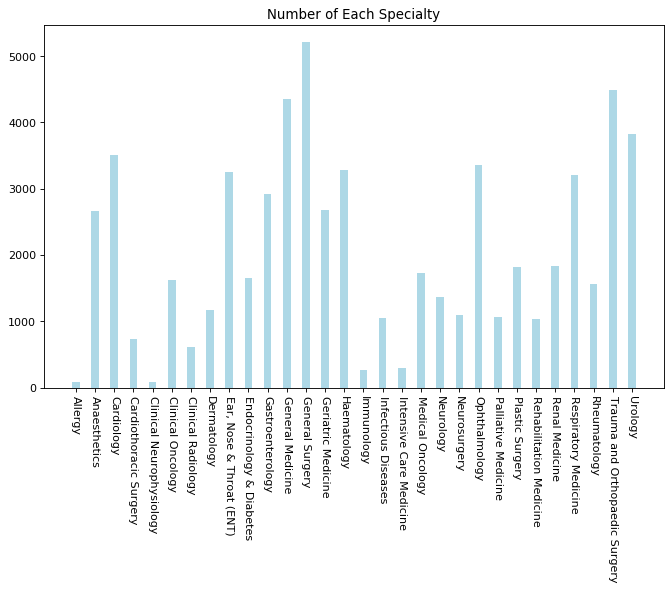

In [95]:
specialty_grouped=treatment_specialty.groupby(['SpecialtyName']).count().reset_index()
x=specialty_grouped['SpecialtyName']
y=specialty_grouped['AverageLengthOfEpisode']
plt.xticks(rotation=-90)
plt.bar(x,y,width=0.4,color='lightblue')
plt.title("Number of Each Specialty")

Text(0.5, 1.0, 'Number of Each Admission Type')

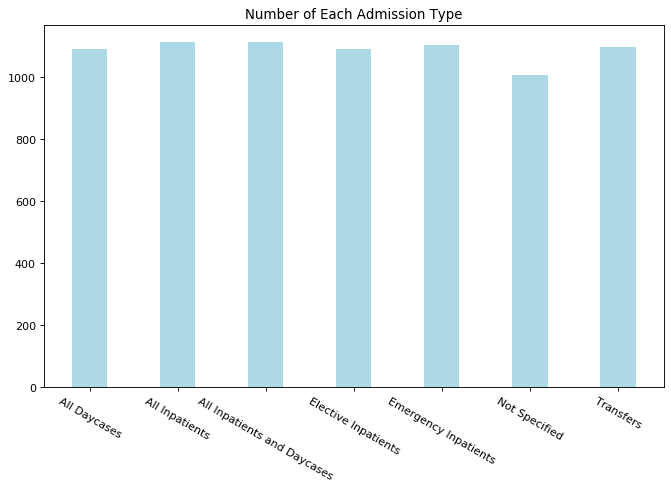

In [60]:
treatment_grouped=treatment.groupby(['AdmissionType']).count().reset_index()
x=treatment_grouped['AdmissionType']
y=treatment_grouped['AverageLengthOfEpisode']
plt.xticks(rotation=-30)
plt.bar(x,y,width=0.4,color='lightblue')
plt.title("Number of Each Admission Type")

Text(0.5, 1.0, 'Number of Each Location')

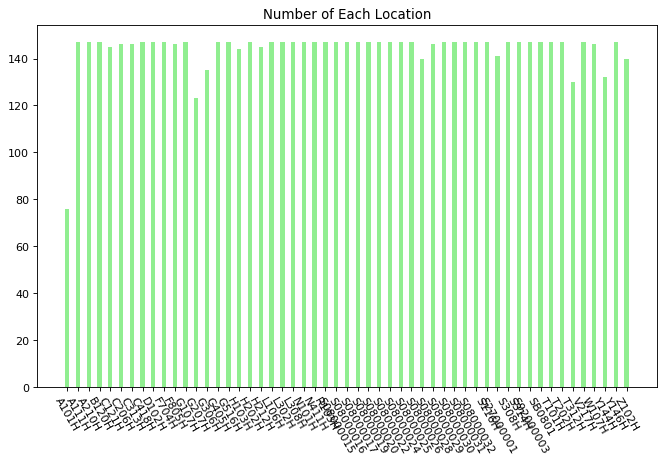

In [64]:
treatment_grouped=treatment.groupby(['Location']).count().reset_index()
x=treatment_grouped['Location']
y=treatment_grouped['AverageLengthOfEpisode']
plt.xticks(rotation=-60)
plt.bar(x,y,width=0.4,color='lightgreen')
plt.title("Number of Each Location")

<BarContainer object of 6 artists>

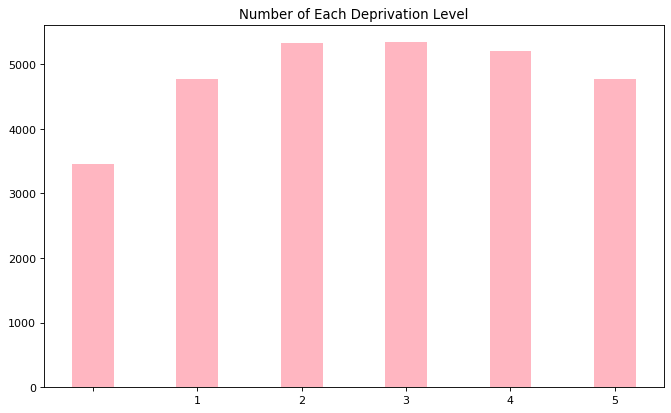

In [91]:
simd_grouped=simd.groupby(['SIMD']).count().reset_index()
x=simd_grouped['SIMD']
y=simd_grouped['AverageLengthOfEpisode']
plt.title("Number of Each Deprivation Level")
plt.bar(x,y,width=0.4,color='lightpink')

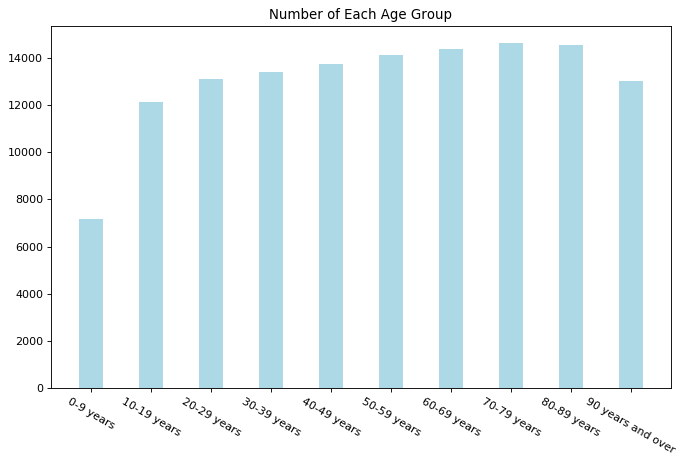

In [65]:
age_grouped=treatment_age_and_sex.groupby(['Age']).count().reset_index()
x=age_grouped['Age']
y=age_grouped['AverageLengthOfEpisode']
plt.xticks(rotation=-30)
plt.bar(x,y,width=0.4,color='lightblue')
plt.title("Number of Each Age Group")
plt.show()

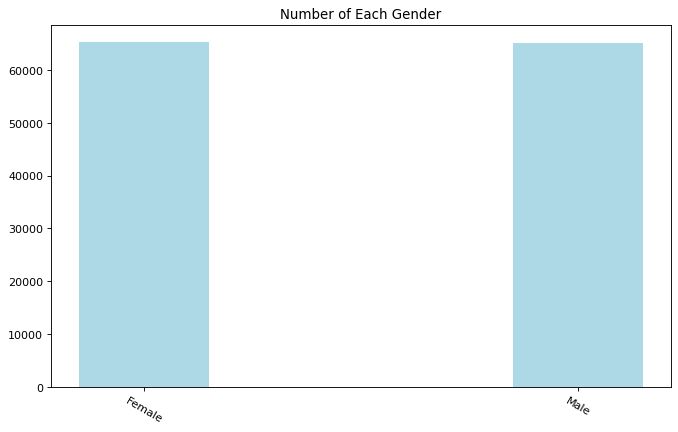

In [68]:
age_grouped=treatment_age_and_sex.groupby(['Sex']).count().reset_index()
x=age_grouped['Sex']
y=age_grouped['AverageLengthOfEpisode']
plt.xticks(rotation=-30)
plt.bar(x,y,width=0.3,color='lightblue')
plt.title("Number of Each Gender")
plt.show()

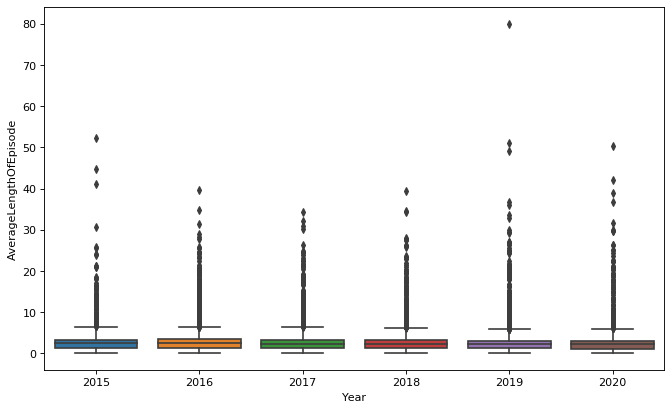

In [69]:
sns.boxplot(x="Year", y="AverageLengthOfEpisode", data=simd)

D:\software\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


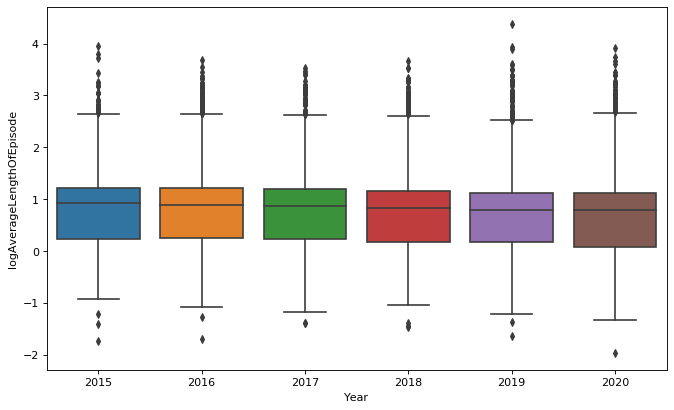

In [4]:
logAverageLengthOfEpisode=np.log(simd['AverageLengthOfEpisode'])
simd['logAverageLengthOfEpisode']=logAverageLengthOfEpisode
sns.boxplot(x="Year", y="logAverageLengthOfEpisode", data=simd)

D:\software\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

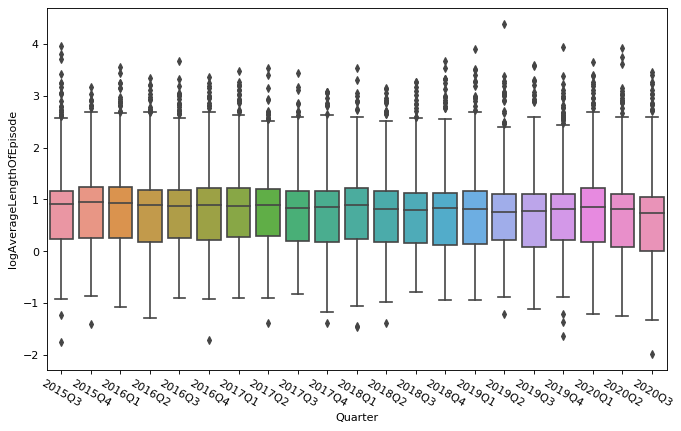

In [35]:
logAverageLengthOfEpisode=np.log(simd['AverageLengthOfEpisode'])
simd['logAverageLengthOfEpisode']=logAverageLengthOfEpisode
sns.boxplot(x="Quarter", y="logAverageLengthOfEpisode", data=simd)
plt.xticks(rotation=-30)

D:\software\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


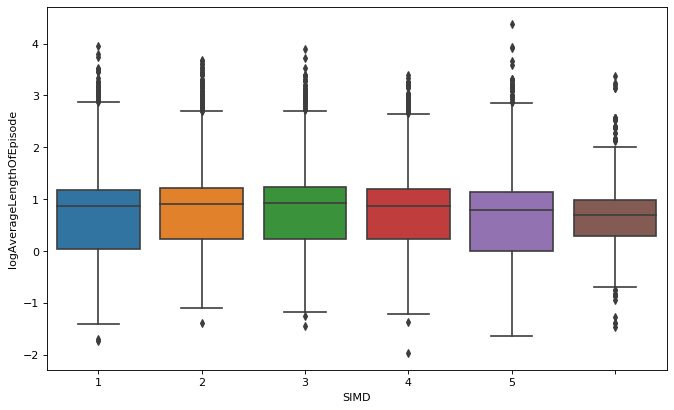

In [96]:
logAverageLengthOfEpisode=np.log(simd['AverageLengthOfEpisode'])
simd['logAverageLengthOfEpisode']=logAverageLengthOfEpisode
sns.boxplot(x="SIMD", y="logAverageLengthOfEpisode", data=simd)

D:\software\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

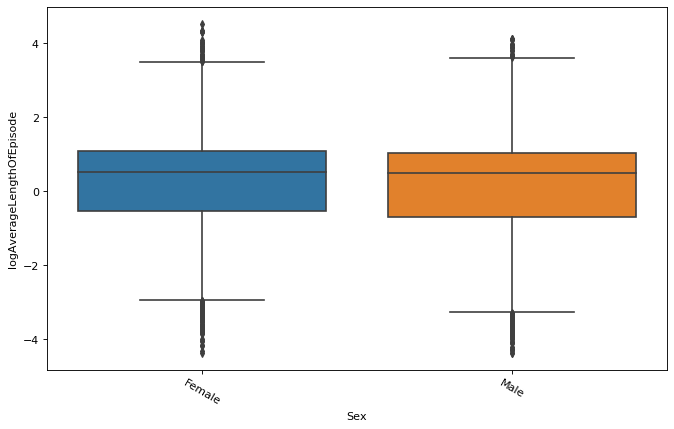

In [79]:
logAverageLengthOfEpisode=np.log(treatment_age_and_sex['AverageLengthOfEpisode'])
treatment_age_and_sex['logAverageLengthOfEpisode']=logAverageLengthOfEpisode
sns.boxplot(x="Sex", y="logAverageLengthOfEpisode", data=treatment_age_and_sex)
plt.xticks(rotation=-30)

D:\software\anaconda\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
D:\software\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\software\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\software\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

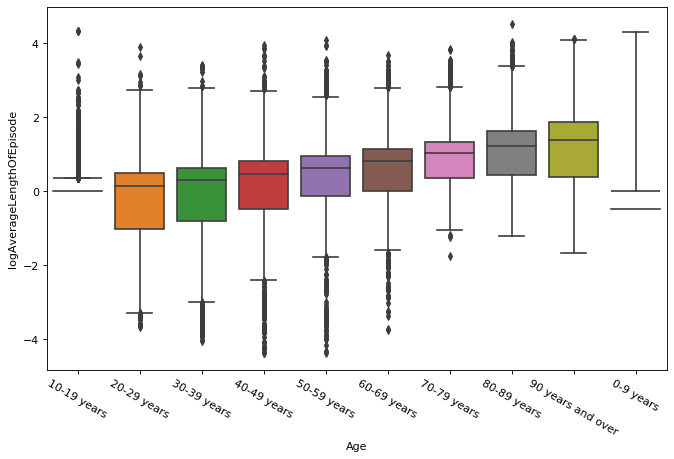

In [80]:
sns.boxplot(x="Age", y="logAverageLengthOfEpisode", data=treatment_age_and_sex)
plt.xticks(rotation=-30)

D:\software\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\software\anaconda\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
D:\software\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\software\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\software\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\software\anaconda\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


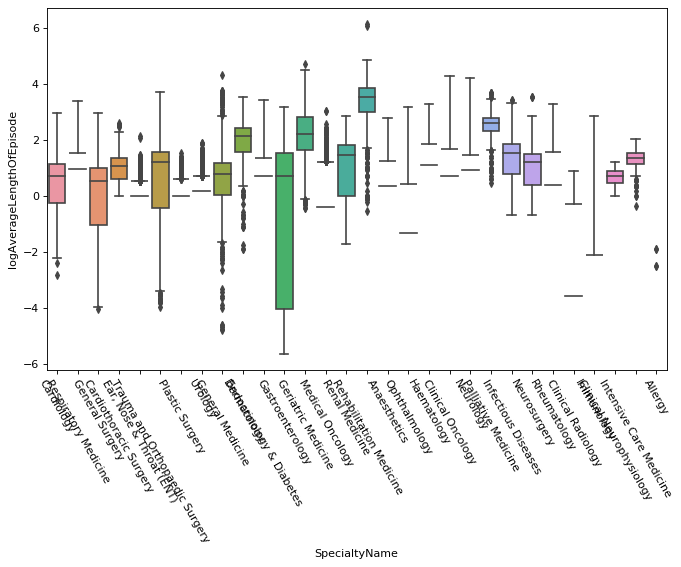

In [86]:
logAverageLengthOfEpisode=np.log(treatment_specialty['AverageLengthOfEpisode'])
treatment_specialty['logAverageLengthOfEpisode']=logAverageLengthOfEpisode
sns.boxplot(x="SpecialtyName", y="logAverageLengthOfEpisode", data=treatment_specialty)
plt.xticks(rotation=-60)
plt.show()

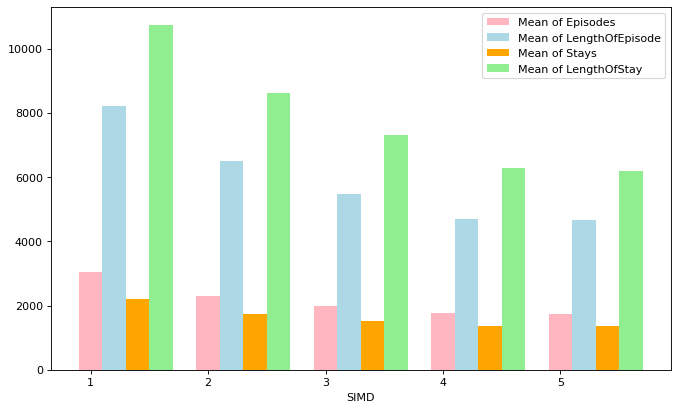

In [13]:
simd_grouped=simd.groupby(['SIMD']).mean().reset_index()
x=list(simd_grouped['SIMD'][1:6])
x=[int(i) for i in x]
y1=list(simd_grouped['Episodes'][1:6])
y2=list(simd_grouped['LengthOfEpisode'][1:6])
y3=list(simd_grouped['Stays'][1:6])
y4=list(simd_grouped['LengthOfStay'][1:6])
y1=[int(i) for i in y1]
y2=[int(i) for i in y2]
y3=[int(i) for i in y3]
y4=[int(i) for i in y4]
total_width, n = 0.8, 4
width = total_width / n
plt.bar(x,y1, width=width,label='Mean of Episodes', fc='lightpink')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y2, width=width,label='Mean of LengthOfEpisode', fc='lightblue')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y3, width=width,label='Mean of Stays', fc='orange')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y4, width=width,label='Mean of LengthOfStay', fc='lightgreen')
plt.xlabel("SIMD")
#plt.ylabel("Average Episodes")
plt.legend()
plt.show()

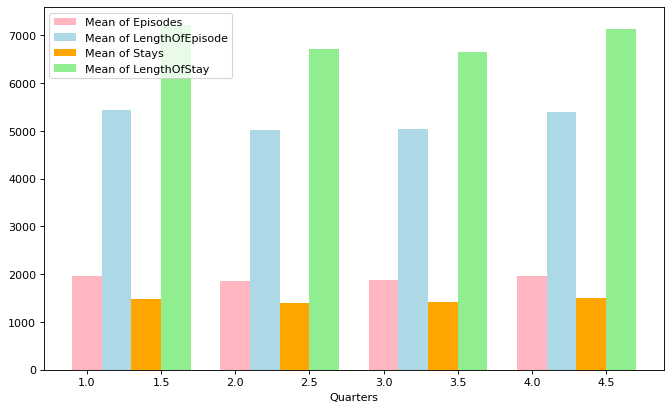

In [34]:
quarter_grouped=simd.groupby(['Quarters']).mean().reset_index()
x=[1,2,3,4]
x=[int(i) for i in x]
y1=list(quarter_grouped['Episodes'][0:4])
y2=list(quarter_grouped['LengthOfEpisode'][0:4])
y3=list(quarter_grouped['Stays'][0:4])
y4=list(quarter_grouped['LengthOfStay'][0:4])
y1=[int(i) for i in y1]
y2=[int(i) for i in y2]
y3=[int(i) for i in y3]
y4=[int(i) for i in y4]
total_width, n = 0.8, 4
width = total_width / n
plt.bar(x,y1, width=width,label='Mean of Episodes', fc='lightpink')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y2, width=width,label='Mean of LengthOfEpisode', fc='lightblue')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y3, width=width,label='Mean of Stays', fc='orange')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y4, width=width,label='Mean of LengthOfStay', fc='lightgreen')
plt.xlabel("Quarters")
#plt.ylabel("Average Episodes")
plt.legend()
plt.show()